In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import f_oneway

from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Reading the CSV file into a df
file_path = '/content/audio_features_final.csv'
df = pd.read_csv(file_path)
#print(df.iloc[0:10])


In [ ]:
X = df.iloc[:, 1:-1]  # Features (all columns except the first and the last)
y = df.iloc[:, -1]    # Labels (the last column)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#experimentation in order to decide whether we will reduce dimensionality
k = 10
selector = SelectKBest(score_func=f_classif, k=k)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print(f'Selected features: {selected_features}')

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_selected, y_train)

y_pred = logistic_regression.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Selected features: Index(['@attribute loudness_sma3_amean numeric',
       '@attribute loudness_sma3_percentile50.0 numeric',
       '@attribute loudness_sma3_percentile80.0 numeric',
       '@attribute loudness_sma3_stddevRisingSlope numeric',
       '@attribute loudness_sma3_stddevFallingSlope numeric',
       '@attribute mfcc4_sma3_amean numeric',
       '@attribute F1amplitudeLogRelF0_sma3nz_stddevNorm numeric',
       '@attribute F2frequency_sma3nz_stddevNorm numeric',
       '@attribute F2amplitudeLogRelF0_sma3nz_stddevNorm numeric',
       '@attribute F3amplitudeLogRelF0_sma3nz_stddevNorm numeric'],
      dtype='object')
Accuracy: 0.66
Precision: 0.6774193548387096
Recall: 0.75
F1 Score: 0.7118644067796611


In [ ]:
'''commented out because we decided to reduce the dimensionality'''
# model = LogisticRegression()

# # Train the model
# model.fit(X_train_scaled, y_train)

# # Make predictions on the testing data
# y_pred_lr = model.predict(X_test_scaled)

# #evaluation
# accuracy_lr = accuracy_score(y_test, y_pred_lr)
# precision_lr = precision_score(y_test, y_pred_lr)
# recall_lr = recall_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)

# print("Logistic Regression Metrics:")
# print("Accuracy:", accuracy_lr)
# print("Precision:", precision_lr)
# print("Recall:", recall_lr)
# print("F1 Score:", f1_lr)

'commented out because we decided to reduce the dimensionality'

In [ ]:
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_selected, y_train)

# Make predictions on the testing data
svm_y_pred = svm_model.predict(X_test_selected)

# Evaluate model performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred)
recall_svm = recall_score(y_test, svm_y_pred)
f1_svm = f1_score(y_test, svm_y_pred)

print("\nSVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


SVM:
Accuracy: 0.64
Precision: 0.6470588235294118
Recall: 0.7857142857142857
F1 Score: 0.7096774193548386


In [ ]:
# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_selected, y_train)

# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test_selected)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred )
recall_rf = recall_score(y_test, rf_y_pred)
f1_rf = f1_score(y_test, rf_y_pred)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest:
Accuracy: 0.58
Precision: 0.6666666666666666
Recall: 0.5
F1 Score: 0.5714285714285715


In [ ]:
#is there a difference between the models?
f_statistic, p_value = f_oneway([accuracy], [svm_accuracy] , [rf_accuracy])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (accuracy):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")


One-way ANOVA Test (accuracy):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [ ]:
#is there a difference between the models?
f_statistic, p_value = f_oneway([precision], [precision_svm] , [precision_rf])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (precision):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")


One-way ANOVA Test (precision):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.


In [ ]:
#is there a difference between the models?
f_statistic, p_value = f_oneway([recall], [recall_svm] , [recall_rf])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (recall):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")


One-way ANOVA Test (recall):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.


In [ ]:
#is there a difference between the models?
f_statistic, p_value = f_oneway([f1], [f1_svm] , [f1_rf])

# Interpret results
alpha = 0.05
print("One-way ANOVA Test (f1):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("The null hypothesis (all means are equal) is rejected. There are statistically significant differences between at least two models.")
else:
    print("The null hypothesis cannot be rejected. There are no statistically significant differences between the models.")

One-way ANOVA Test (f1):
F-statistic: nan
P-value: nan
The null hypothesis cannot be rejected. There are no statistically significant differences between the models.


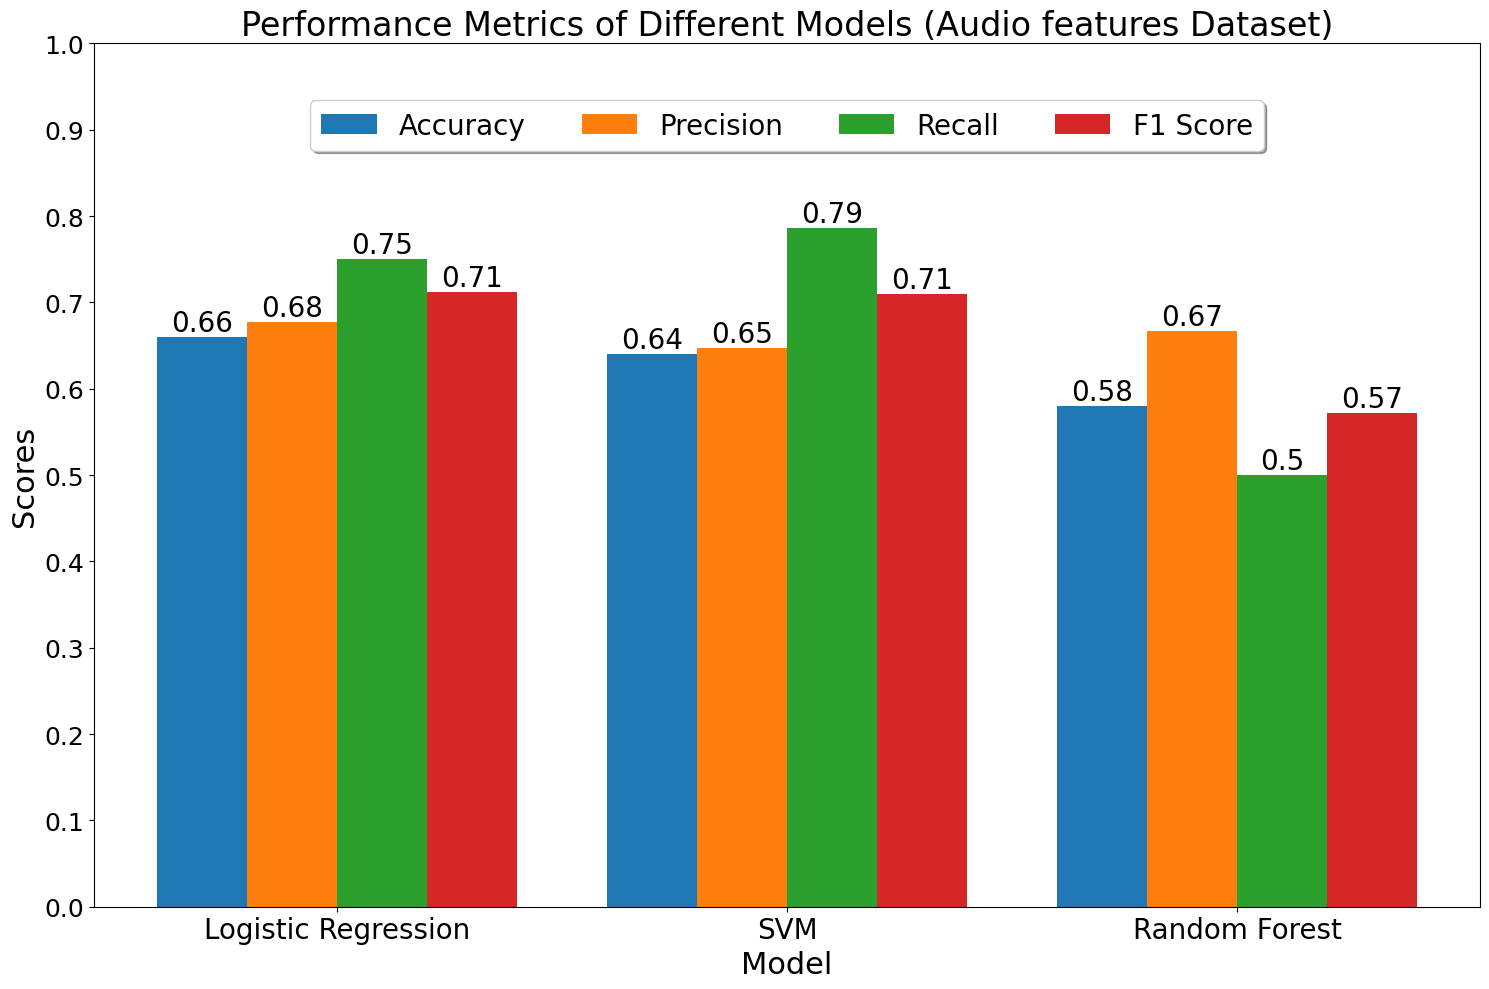

In [ ]:
# Model names
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Performance metrics
accuracy_scores = [accuracy, svm_accuracy, rf_accuracy]
precision_scores = [precision, precision_svm, precision_rf]
recall_scores = [recall, recall_svm, recall_rf]
f1_scores = [f1, f1_svm, f1_rf]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(15, 10))

bars1 = plt.bar(index - 1.5*bar_width, accuracy_scores, bar_width, label='Accuracy')
bars2 = plt.bar(index - 0.5*bar_width, precision_scores, bar_width, label='Precision')
bars3 = plt.bar(index + 0.5*bar_width, recall_scores, bar_width, label='Recall')
bars4 = plt.bar(index + 1.5*bar_width, f1_scores, bar_width, label='F1 Score')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize = 20)

plt.xlabel('Model', fontsize = 22)
plt.ylabel('Scores', fontsize = 22)
plt.title('Performance Metrics of Different Models (Audio features Dataset)', fontsize = 24)
plt.xticks(index, models, fontsize = 20)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4, fontsize=20)

# Show plot
plt.tight_layout()
plt.show()